In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
import missingno as msno
import openpyxl
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
#%matplotlib inline
#from utility import utils as u
os.chdir("C:\\src\\")
from utility import utils as u

In [2]:
import sklearn
import urllib.request
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, f1_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [3]:
os.chdir("C:\\src\\data\\raw\\")  # Establecemos el directorio de trabajo
os.getcwd() # Comprobamos que el directorio de trabajo sea el correcto

'C:\\src\\data\\raw'

In [4]:
# Cargamos los ficheros originales 

In [5]:
df1,dr1=u.cargar_fichero("FIFA18_official_data.csv","17-18.csv","01/09/2018")
df2,dr2=u.cargar_fichero("FIFA19_official_data.csv","18-19.csv","01/09/2019")
df3,dr3=u.cargar_fichero("FIFA20_official_data.csv","19-20.csv","01/09/2020")
df4,dr4=u.cargar_fichero("FIFA21_official_data.csv","20-21.csv","01/09/2021")
df5,dr5=u.cargar_fichero("FIFA22_official_data.csv","21-22.csv","01/09/2022")
data_Fifa, data_Real=u.conc_1(df1,df2,df3,df4,dr1,dr2,dr3,dr4)

In [6]:
data_Fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70082 entries, 0 to 17107
Data columns (total 67 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        70082 non-null  int64         
 1   Name                      70082 non-null  object        
 2   Age                       70082 non-null  int64         
 3   Photo                     70082 non-null  object        
 4   Nationality               70082 non-null  object        
 5   Flag                      70082 non-null  object        
 6   Overall                   70082 non-null  int64         
 7   Potential                 70082 non-null  int64         
 8   Club                      68879 non-null  object        
 9   Club Logo                 70082 non-null  object        
 10  Value                     70082 non-null  object        
 11  Wage                      70082 non-null  object        
 12  Special           

In [7]:
data_Fifa["Value"] = data_Fifa["Value"].str.replace('€',"")
data_Fifa["Value"] = data_Fifa["Value"].str.replace('M',"")
data_Fifa["Value"] = data_Fifa["Value"].str.replace('K',"")
data_Fifa["Wage"] = data_Fifa["Wage"].str.replace('€',"")
data_Fifa["Wage"] = data_Fifa["Wage"].str.replace('K',"")
data_Fifa["Weight"] = data_Fifa["Weight"].str.replace('lbs',"")
data_Fifa["Weight"] = data_Fifa["Weight"].astype(float)

In [8]:
data_Fifa['Weight']= data_Fifa['Weight'] * 0.453592

In [9]:
data_Fifa["Height"] = data_Fifa["Height"].str.replace("'",".")

In [10]:
data_Fifa["Height"]

0         6.0
1         5.9
2         5.8
3        5.11
4         6.3
         ... 
17103     6.4
17104     6.5
17105     6.3
17106     6.1
17107     6.0
Name: Height, Length: 70082, dtype: object

In [11]:
data_Fifa["Height"] = data_Fifa["Height"].str.replace('lbs',"")
data_Fifa["Height"] = data_Fifa["Height"].str.replace('cm',"")
new = data_Fifa["Height"].str.split(".", n= 1, expand=True)
data_Fifa["Foot"]=new[0]
data_Fifa["inc"]=new[1]
data_Fifa["Height"] = data_Fifa["Height"].astype(float)
data_Fifa["Foot"]=data_Fifa["Foot"].astype(float)
data_Fifa["inc"]=data_Fifa["inc"].astype(float)

In [12]:
data_Fifa["Foot"]=data_Fifa["Foot"]*12
data_Fifa["inc"]=data_Fifa["inc"]*2.54

In [13]:
data_Fifa["Height"]= data_Fifa["Foot"] + data_Fifa["inc"]

In [14]:
df5["Weight"] = df5["Weight"].str.replace('kg',"")
df5["Height"] = df5["Height"].str.replace('cm',"")

In [15]:
df5["Value"] = df5["Value"].str.replace('$',"")
df5["Value"] = df5["Value"].str.replace('M',"")
df5["Value"] = df5["Value"].str.replace('€',"")
df5["Value"] = df5["Value"].str.replace('K',"")

In [16]:
df5["Wage"] = df5["Wage"].str.replace('€',"")
df5["Wage"] = df5["Wage"].str.replace('K',"")
df5["Wage"] = df5["Wage"].str.replace('M',"")

In [17]:
df5.shape

(16710, 67)

In [18]:
data_Fifa

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,Year,Orden,DefensiveAwareness,Foot,inc
0,176580,L. Suárez,30,https://cdn.sofifa.com/players/176/580/18_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,92,92,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,33.0,37.0,CF,88.0,€198.9M,2018-01-09,1,NaN,72.0,0.00
1,178518,R. Nainggolan,29,https://cdn.sofifa.com/players/178/518/18_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,86,86,Roma,https://cdn.sofifa.com/teams/52/light_30.png,...,8.0,11.0,CDM,84.0,€72.3M,2018-01-09,1,NaN,60.0,22.86
2,203551,A. Florenzi,26,https://cdn.sofifa.com/players/203/551/18_60.png,Italy,https://cdn.sofifa.com/flags/it.png,82,83,Roma,https://cdn.sofifa.com/teams/52/light_30.png,...,11.0,10.0,CF,81.0,€37.3M,2018-01-09,1,NaN,60.0,20.32
3,197445,D. Alaba,25,https://cdn.sofifa.com/players/197/445/18_60.png,Austria,https://cdn.sofifa.com/flags/at.png,85,87,FC Bayern München,https://cdn.sofifa.com/teams/21/light_30.png,...,15.0,9.0,LB,82.0,€66.4M,2018-01-09,1,NaN,60.0,27.94
4,195864,P. Pogba,24,https://cdn.sofifa.com/players/195/864/18_60.png,France,https://cdn.sofifa.com/flags/fr.png,88,92,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,...,4.0,3.0,CM,85.0,€146.3M,2018-01-09,1,NaN,72.0,7.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17103,247866,19 C. Miszta,16,https://cdn.sofifa.com/players/247/866/19_60.png,Poland,https://cdn.sofifa.com/flags/pl.png,50,70,Legia Warszawa,https://cdn.sofifa.com/teams/1871/light_30.png,...,40.0,56.0,GK,49.0,€120K,2021-01-09,1,NaN,72.0,10.16
17104,251433,B. Voll,19,https://cdn.sofifa.com/players/251/433/20_60.png,Germany,https://cdn.sofifa.com/flags/de.png,51,63,FC Hansa Rostock,https://cdn.sofifa.com/teams/27/light_30.png,...,42.0,57.0,GK,51.0,€83K,2021-01-09,1,5.0,72.0,12.70
17105,252420,T. Parker,18,https://cdn.sofifa.com/players/252/420/20_60.png,Northern Ireland,https://cdn.sofifa.com/flags/gb-nir.png,51,70,Luton Town,https://cdn.sofifa.com/teams/1923/light_30.png,...,53.0,55.0,GK,51.0,€149K,2021-01-09,1,8.0,72.0,7.62
17106,248182,H. Sveijer,18,https://cdn.sofifa.com/players/248/182/20_60.png,Sweden,https://cdn.sofifa.com/flags/se.png,49,63,IK Sirius,https://cdn.sofifa.com/teams/113458/light_30.png,...,50.0,51.0,GK,49.0,€94K,2021-01-09,1,8.0,72.0,2.54


In [19]:
df5

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,Year,Orden
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0,2022-01-09,1
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0,2022-01-09,1
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0,2022-01-09,1
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0,2022-01-09,1
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0,2022-01-09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,240558,18 L. Clayton,17,https://cdn.sofifa.com/players/240/558/18_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,53,70,Cheltenham Town,https://cdn.sofifa.com/teams/1936/30.png,...,54.0,52.0,50.0,59.0,GK,52.0,€238K,NaN,2022-01-09,1
16706,262846,�. Dobre,20,https://cdn.sofifa.com/players/262/846/22_60.png,Romania,https://cdn.sofifa.com/flags/ro.png,53,63,FC Academica Clinceni,https://cdn.sofifa.com/teams/113391/30.png,...,52.0,53.0,48.0,58.0,GK,53.0,€279K,5.0,2022-01-09,1
16707,241317,21 Xue Qinghao,19,https://cdn.sofifa.com/players/241/317/21_60.png,China PR,https://cdn.sofifa.com/flags/cn.png,47,60,Shanghai Shenhua FC,https://cdn.sofifa.com/teams/110955/30.png,...,48.0,45.0,38.0,52.0,GK,47.0,€223K,21.0,2022-01-09,1
16708,259646,A. Shaikh,18,https://cdn.sofifa.com/players/259/646/22_60.png,India,https://cdn.sofifa.com/flags/in.png,47,67,ATK Mohun Bagan FC,https://cdn.sofifa.com/teams/113146/30.png,...,41.0,39.0,45.0,49.0,GK,47.0,€259K,7.0,2022-01-09,1


In [20]:
data_Fifa, data_Real=u.c5(data_Fifa,df5,data_Real,dr5)

In [21]:
data_Fifa

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,Year,Orden,DefensiveAwareness,Foot,inc
0,176580,L. Suárez,30,https://cdn.sofifa.com/players/176/580/18_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,92,92,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,33.0,37.0,CF,88.0,€198.9M,2018-01-09,1,NaN,72.0,0.00
1,178518,R. Nainggolan,29,https://cdn.sofifa.com/players/178/518/18_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,86,86,Roma,https://cdn.sofifa.com/teams/52/light_30.png,...,8.0,11.0,CDM,84.0,€72.3M,2018-01-09,1,NaN,60.0,22.86
2,203551,A. Florenzi,26,https://cdn.sofifa.com/players/203/551/18_60.png,Italy,https://cdn.sofifa.com/flags/it.png,82,83,Roma,https://cdn.sofifa.com/teams/52/light_30.png,...,11.0,10.0,CF,81.0,€37.3M,2018-01-09,1,NaN,60.0,20.32
3,197445,D. Alaba,25,https://cdn.sofifa.com/players/197/445/18_60.png,Austria,https://cdn.sofifa.com/flags/at.png,85,87,FC Bayern München,https://cdn.sofifa.com/teams/21/light_30.png,...,15.0,9.0,LB,82.0,€66.4M,2018-01-09,1,NaN,60.0,27.94
4,195864,P. Pogba,24,https://cdn.sofifa.com/players/195/864/18_60.png,France,https://cdn.sofifa.com/flags/fr.png,88,92,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,...,4.0,3.0,CM,85.0,€146.3M,2018-01-09,1,NaN,72.0,7.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,240558,18 L. Clayton,17,https://cdn.sofifa.com/players/240/558/18_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,53,70,Cheltenham Town,https://cdn.sofifa.com/teams/1936/30.png,...,50.0,59.0,GK,52.0,€238K,2022-01-09,1,NaN,NaN,NaN
16706,262846,�. Dobre,20,https://cdn.sofifa.com/players/262/846/22_60.png,Romania,https://cdn.sofifa.com/flags/ro.png,53,63,FC Academica Clinceni,https://cdn.sofifa.com/teams/113391/30.png,...,48.0,58.0,GK,53.0,€279K,2022-01-09,1,5.0,NaN,NaN
16707,241317,21 Xue Qinghao,19,https://cdn.sofifa.com/players/241/317/21_60.png,China PR,https://cdn.sofifa.com/flags/cn.png,47,60,Shanghai Shenhua FC,https://cdn.sofifa.com/teams/110955/30.png,...,38.0,52.0,GK,47.0,€223K,2022-01-09,1,21.0,NaN,NaN
16708,259646,A. Shaikh,18,https://cdn.sofifa.com/players/259/646/22_60.png,India,https://cdn.sofifa.com/flags/in.png,47,67,ATK Mohun Bagan FC,https://cdn.sofifa.com/teams/113146/30.png,...,45.0,49.0,GK,47.0,€259K,2022-01-09,1,7.0,NaN,NaN


In [22]:
data_Real=u.limpiar_dataframe(data_Real)
data_Fifa=u.limpiar_dataframe2(data_Fifa)
data_Fifa=u.cambios_nombre(data_Fifa)
data_Real, data_Fifa, pais1, pais2, pais3, pais4, pais5=u.equipo_anyo(data_Fifa,data_Real)
data_Fifa =u.liga(pais1,data_Fifa,"2018-01-09")
data_Fifa =u.liga(pais2,data_Fifa,"2019-01-09")
data_Fifa =u.liga(pais3,data_Fifa,"2020-01-09")
data_Fifa =u.liga(pais4,data_Fifa,"2021-01-09")
data_Fifa =u.liga(pais5,data_Fifa,"2022-01-09")
data_Fifa, data_Real=u.modificar_dataframe(data_Fifa, data_Real)

In [23]:
data_Fifa

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred_Foot,...,Foot,inc,Pais,PAC,SHO,PAS,DRI,DEF,PHY,TOT
0,L. Suárez,30,Uruguay,92,92,Barcelona,97,500,2321,Right,...,72.0,0.00,ESP,82.5,88.666667,79.666667,86.500000,46.2,82.00,77.588889
1,R. Nainggolan,29,Belgium,86,86,Roma,42.5,130,2286,Right,...,60.0,22.86,ITA,78.0,78.666667,75.833333,83.500000,79.4,83.50,79.816667
2,A. Florenzi,26,Italy,82,83,Roma,21,70,2267,Right,...,60.0,20.32,ITA,85.0,80.833333,77.000000,82.166667,75.6,77.75,79.725000
3,D. Alaba,25,Austria,85,87,Bayern Munich,38.5,130,2263,Left,...,60.0,27.94,GER,83.5,75.666667,80.666667,80.166667,79.8,76.75,79.425000
4,P. Pogba,24,France,88,92,Manchester Utd,76,250,2262,Right,...,72.0,7.62,ENG,76.5,81.500000,84.833333,81.000000,69.4,86.25,79.913889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16661,N. Sauter,18,Germany,56,69,Freiburg,300,500,842,Right,...,NaN,NaN,GER,27.0,0.000000,0.000000,0.000000,0.0,0.00,50.333333
16662,V. Sinisalo,19,Finland,55,70,Aston Villa,250,2,841,Right,...,NaN,NaN,ENG,23.0,0.000000,0.000000,0.000000,0.0,0.00,50.333333
16676,L. Philipp,20,Germany,60,72,Hoffenheim,525,2,831,Right,...,NaN,NaN,GER,26.5,0.000000,0.000000,0.000000,0.0,0.00,53.750000
16690,P. Zovko,19,Bosnia and Herzegovina,58,73,Spezia,425,850,816,Left,...,NaN,NaN,ITA,20.0,0.000000,0.000000,0.000000,0.0,0.00,52.500000


In [24]:
# Calcular por equipo y año el valor medio de la plantilla, sumando las cartas totales y dividiendolo por numero de jugadores, para cada equipo y cada liga. 
#data_medias=data_Fifa.groupby(by=["Club","Year","Pais"]).mean()  
# data_medias=data_Fifa.groupby(by=["Club","Year"]).mean()  
data_medias=data_Fifa[data_Fifa.Pais == "ESP"].groupby(by=["Club","Year"]).mean()

In [25]:
#Exportar
data_Fifa, data_Real, data_medias, data_medidas_1=u.exportar(data_Fifa, data_Real)
u.conv_xlsx("data_Fifa.csv","data_Real.csv","data_medias.csv","data_medidas.csv")

***HASTA AQUI DEBERIA ESTAR TODO EN FUNCIONES ***

In [26]:
data_Fifa2=data_Fifa

**MINI EDA*** 

## Comprobamos si existen nulos

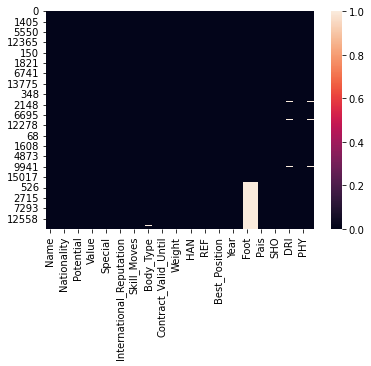

In [27]:
#Analizamos datos vemos las columnas que contienen nulos y adaptamos lo que necesitamos , ver memoria
sns.heatmap(data_Fifa2.isnull(),cbar=True);

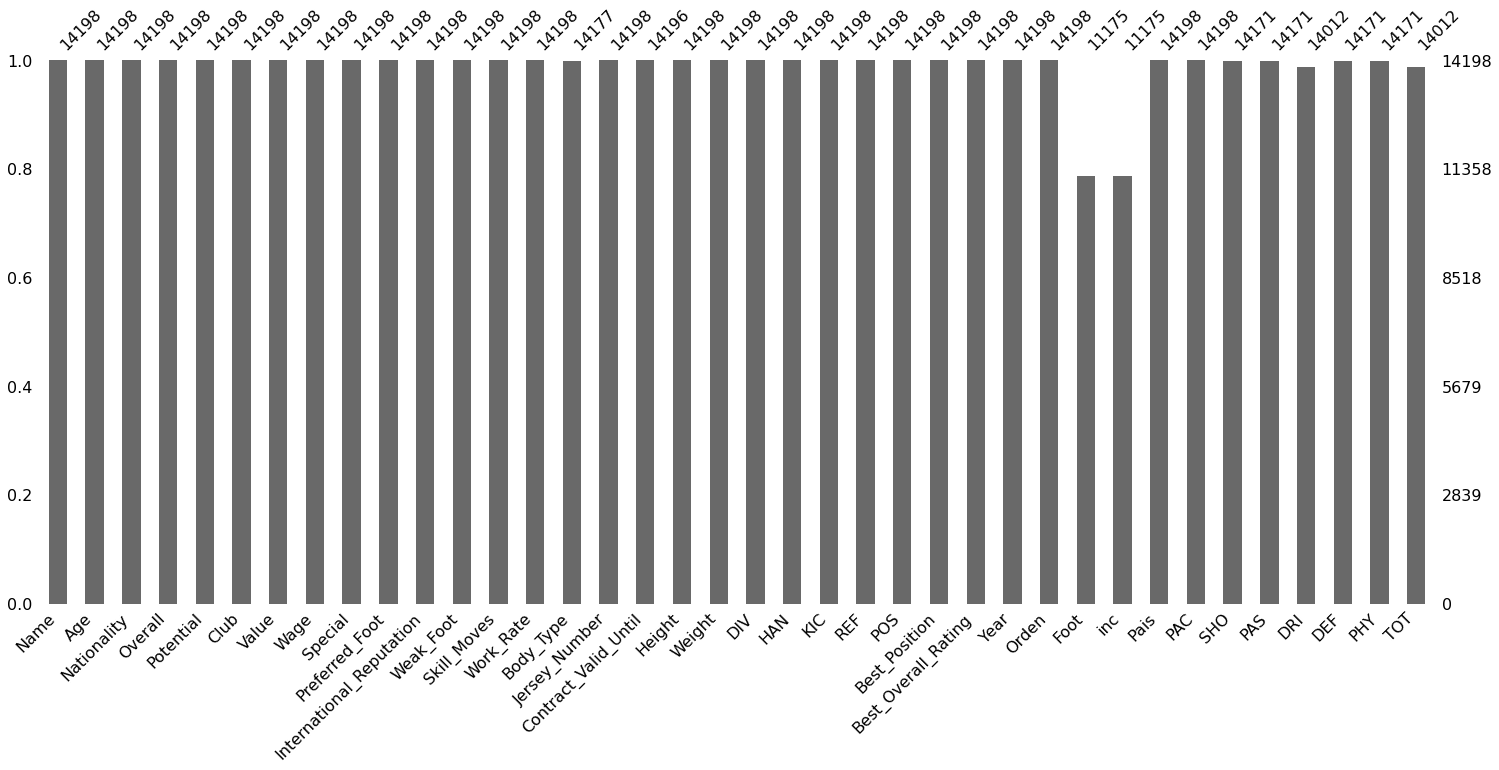

In [28]:
msno.bar(data_Fifa2);

In [29]:
data_Fifa2.isna().sum()

Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                           0
Value                          0
Wage                           0
Special                        0
Preferred_Foot                 0
International_Reputation       0
Weak_Foot                      0
Skill_Moves                    0
Work_Rate                      0
Body_Type                     21
Jersey_Number                  0
Contract_Valid_Until           2
Height                         0
Weight                         0
DIV                            0
HAN                            0
KIC                            0
REF                            0
POS                            0
Best_Position                  0
Best_Overall_Rating            0
Year                           0
Orden                          0
Foot                        3023
inc                         3023
Pais      

## Eliminamos nulos asignando los valores de las medias de cada variable

In [68]:
data_Fifa2=data_Fifa2.fillna(data_Fifa2.mean())

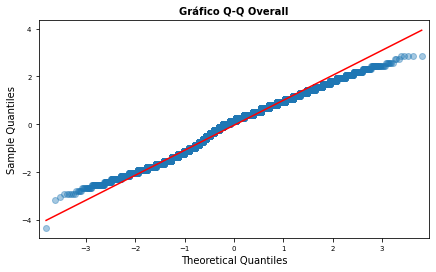

In [69]:
import statsmodels.api as sm
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    data_Fifa2["Overall"],
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q Overall', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

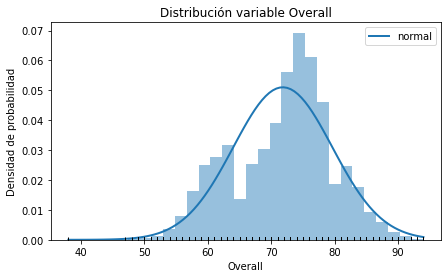

In [70]:
# Histograma + curva normal teórica
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(data_Fifa2["Overall"])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(data_Fifa2["Overall"]), max(data_Fifa2["Overall"]), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=data_Fifa2["Overall"], density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(data_Fifa2["Overall"], np.full_like(data_Fifa2["Overall"], -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución variable Overall')
ax.set_xlabel('Overall')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

In [71]:
# Probamos si la muestra difiere de una distribución normal.

In [72]:
#Shapiro Wilk
shapiro_test = stats.shapiro(data_Fifa2.Overall);
shapiro_test

ShapiroResult(statistic=0.9812974333763123, pvalue=2.905889441051945e-39)

In [73]:
# Diagramas de cajas 

AttributeError: 'DataFrame' object has no attribute 'Club'

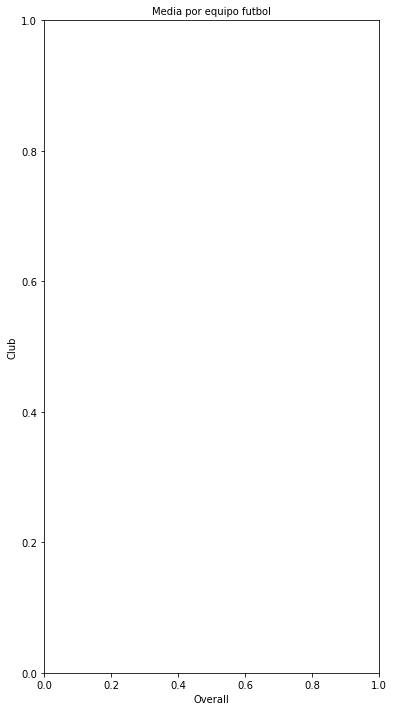

In [74]:
plt.figure(figsize=(6,12),facecolor='w');
plt.title('Media por equipo futbol', fontsize=10)
plt.ylabel('Club', fontsize=10)
plt.xlabel('Overall', fontsize=10)
sns.boxplot(y=data_Fifa2.Club[(data_Fifa2.Pais=="ESP")&(data_Fifa.Year=="2018-01-09")], x=data_Fifa2["Overall"]);

Cuadrado de relacion y algo mas de EDA ver pycaret

*** PREPARACION DE DATOS PARA EL MODELO DE ML ***


## Eliminamos variables que no aportan nada al modelo y creamos copia del dataframe original

In [ ]:
data_Fifa2=data_Fifa.drop(["Name","Nationality","Club","Body_Type","Year","Orden","Pais","Foot","inc","Contract_Valid_Until","Jersey_Number"], axis =1)

## Revisamos el formato de las variables y convertimos las variables que nos interesan de objeto a float

In [ ]:
data_Fifa2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14198 entries, 0 to 16691
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       14198 non-null  int64  
 1   Overall                   14198 non-null  int64  
 2   Potential                 14198 non-null  int64  
 3   Value                     14198 non-null  object 
 4   Wage                      14198 non-null  object 
 5   Special                   14198 non-null  int64  
 6   Preferred_Foot            14198 non-null  object 
 7   International_Reputation  14198 non-null  float64
 8   Weak_Foot                 14198 non-null  float64
 9   Skill_Moves               14198 non-null  float64
 10  Work_Rate                 14198 non-null  object 
 11  Height                    14198 non-null  object 
 12  Weight                    14198 non-null  object 
 13  DIV                       14198 non-null  float64
 14  HAN   

In [ ]:
data_Fifa2["Wage"]=data_Fifa2["Wage"].astype(float)

In [ ]:
data_Fifa2["Value"]=data_Fifa2["Value"].astype(float)

In [ ]:
data_Fifa2["Height"]=data_Fifa2["Height"].astype(float)

In [ ]:
data_Fifa2["Weight"]=data_Fifa2["Weight"].astype(float)

# Vemos los valores unicos por variables , para decidir si usamos dummies o similar

In [ ]:
for i in data_Fifa2.columns:
    print(f'la columna {i} tiene {data_Fifa2[i].nunique()} valores únicos',{data_Fifa2[i].dtype})


la columna Age tiene 28 valores únicos {dtype('int64')}
la columna Overall tiene 49 valores únicos {dtype('int64')}
la columna Potential tiene 40 valores únicos {dtype('int64')}
la columna Value tiene 270 valores únicos {dtype('float64')}
la columna Wage tiene 157 valores únicos {dtype('float64')}
la columna Special tiene 1415 valores únicos {dtype('int64')}
la columna Preferred_Foot tiene 2 valores únicos {dtype('O')}
la columna International_Reputation tiene 5 valores únicos {dtype('float64')}
la columna Weak_Foot tiene 5 valores únicos {dtype('float64')}
la columna Skill_Moves tiene 5 valores únicos {dtype('float64')}
la columna Work_Rate tiene 10 valores únicos {dtype('O')}
la columna Height tiene 59 valores únicos {dtype('float64')}
la columna Weight tiene 94 valores únicos {dtype('float64')}
la columna DIV tiene 68 valores únicos {dtype('float64')}
la columna HAN tiene 72 valores únicos {dtype('float64')}
la columna KIC tiene 74 valores únicos {dtype('float64')}
la columna REF ti

In [ ]:
data_Fifa2["Work_Rate"]

0          High/ Medium
1            High/ High
2          High/ Medium
3          High/ Medium
4             High/ Low
              ...      
16661    Medium/ Medium
16662    Medium/ Medium
16676    Medium/ Medium
16690    Medium/ Medium
16691    Medium/ Medium
Name: Work_Rate, Length: 14198, dtype: object

In [ ]:
data_Fifa2["Preferred_Foot"]

0        Right
1        Right
2        Right
3         Left
4        Right
         ...  
16661    Right
16662    Right
16676    Right
16690     Left
16691    Right
Name: Preferred_Foot, Length: 14198, dtype: object

# categorizamos las variables objetos

In [ ]:
# We convert Categorical to boolean for first dataset
categorical_feature = (data_Fifa2.drop(columns='Overall').dtypes == "object")

# filter categorical columns
categorical_cols = data_Fifa2.drop(columns='Overall').columns[categorical_feature].tolist()

# Binarize categorical values
data_Fifa2 = pd.get_dummies(data_Fifa2, columns=categorical_cols,
prefix=categorical_cols, drop_first=True )


# normalizamos las variablesn numericas para que esten todas a escala, exceptuando overall

In [ ]:
# Min-Max Normalization
data_Fifa2_1 = data_Fifa2.drop('Overall', axis=1)
data_Fifa2_norm = (data_Fifa2_1-data_Fifa2_1.min())/(data_Fifa2_1.max()-data_Fifa2_1.min())
data_Fifa2_norm = pd.concat((data_Fifa2_norm, data_Fifa2.Overall), 1)


data_Fifa2_norm["Overall"]=data_Fifa2["Overall"]

data_Fifa2=data_Fifa2_norm

In [ ]:
data_Fifa2

,Age,Potential,Value,Wage,Special,International_Reputation,Weak_Foot,Skill_Moves,Height,Weight,...,Best_Position_LB,Best_Position_LM,Best_Position_LW,Best_Position_LWB,Best_Position_RB,Best_Position_RM,Best_Position_RW,Best_Position_RWB,Best_Position_ST,Overall
0,0.518519,0.925,0.099487,0.526316,0.982434,1.00,0.75,0.75,0.032594,0.601504,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92
1,0.481481,0.775,0.043590,0.136842,0.960477,0.50,0.50,0.50,0.113410,0.451128,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86
2,0.370370,0.700,0.021538,0.073684,0.948557,0.50,0.50,0.50,0.094508,0.285714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82
3,0.333333,0.800,0.039487,0.136842,0.946048,0.75,0.75,0.50,0.151213,0.436090,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85
4,0.296296,0.925,0.077949,0.263158,0.945420,0.75,0.75,1.00,0.089299,0.563910,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16661,0.074074,0.350,0.307692,0.526316,0.054580,0.00,0.25,0.00,0.910701,0.499022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56
16662,0.111111,0.375,0.256410,0.002105,0.053952,0.00,0.25,0.00,0.955350,0.432718,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55
16676,0.148148,0.425,0.538462,0.002105,0.047679,0.00,0.25,0.00,0.925584,0.548751,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60
16690,0.111111,0.450,0.435897,0.894737,0.038269,0.00,0.25,0.00,0.925584,0.499022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58


## Segregamos los modelos por tipo de jugador , diferencian entre jugador de campo y portero

In [ ]:
# Separar porteros de jugadores , arreglar los dataframes, eliminando las varibles que no corresponden al tipo de jugador
data_Fifa_GK=data_Fifa2[(data_Fifa['Best_Position'] == "GK")]
data_Fifa_FOT=data_Fifa2[(data_Fifa['Best_Position'] != "GK")]

In [ ]:
data_Fifa2

,Age,Potential,Value,Wage,Special,International_Reputation,Weak_Foot,Skill_Moves,Height,Weight,...,Best_Position_LB,Best_Position_LM,Best_Position_LW,Best_Position_LWB,Best_Position_RB,Best_Position_RM,Best_Position_RW,Best_Position_RWB,Best_Position_ST,Overall
0,0.518519,0.925,0.099487,0.526316,0.982434,1.00,0.75,0.75,0.032594,0.601504,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92
1,0.481481,0.775,0.043590,0.136842,0.960477,0.50,0.50,0.50,0.113410,0.451128,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86
2,0.370370,0.700,0.021538,0.073684,0.948557,0.50,0.50,0.50,0.094508,0.285714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82
3,0.333333,0.800,0.039487,0.136842,0.946048,0.75,0.75,0.50,0.151213,0.436090,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85
4,0.296296,0.925,0.077949,0.263158,0.945420,0.75,0.75,1.00,0.089299,0.563910,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16661,0.074074,0.350,0.307692,0.526316,0.054580,0.00,0.25,0.00,0.910701,0.499022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56
16662,0.111111,0.375,0.256410,0.002105,0.053952,0.00,0.25,0.00,0.955350,0.432718,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55
16676,0.148148,0.425,0.538462,0.002105,0.047679,0.00,0.25,0.00,0.925584,0.548751,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60
16690,0.111111,0.450,0.435897,0.894737,0.038269,0.00,0.25,0.00,0.925584,0.499022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58


In [ ]:
data_Fifa_FOT

,Age,Potential,Value,Wage,Special,International_Reputation,Weak_Foot,Skill_Moves,Height,Weight,...,Best_Position_LB,Best_Position_LM,Best_Position_LW,Best_Position_LWB,Best_Position_RB,Best_Position_RM,Best_Position_RW,Best_Position_RWB,Best_Position_ST,Overall
0,0.518519,0.925,0.099487,0.526316,0.982434,1.00,0.75,0.75,0.032594,0.601504,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92
1,0.481481,0.775,0.043590,0.136842,0.960477,0.50,0.50,0.50,0.113410,0.451128,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86
2,0.370370,0.700,0.021538,0.073684,0.948557,0.50,0.50,0.50,0.094508,0.285714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82
3,0.333333,0.800,0.039487,0.136842,0.946048,0.75,0.75,0.50,0.151213,0.436090,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85
4,0.296296,0.925,0.077949,0.263158,0.945420,0.75,0.75,1.00,0.089299,0.563910,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15184,0.148148,0.575,0.000000,0.000000,0.322459,0.00,0.50,0.00,0.806519,0.266956,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70
15226,0.074074,0.400,0.358974,0.526316,0.316186,0.00,0.50,0.25,0.888376,0.499022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57
15339,0.074074,0.300,0.112821,0.736842,0.299247,0.00,0.25,0.25,0.813960,0.399565,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,49
15383,0.074074,0.400,0.358974,0.526316,0.292974,0.00,0.50,0.25,0.873493,0.416142,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57


# Deberes, probar si eliminando esta variable del modelo "Best_Position", mejoran los valores.

data_Fifa_GK=data_Fifa_GK.drop(["Best_Position"], axis =1)
data_Fifa_FOT=data_Fifa_FOT.drop(["Best_Position"], axis =1)

In [ ]:
#data_Fifa_GK_, data_Fifa_FOT=u.exportar(data_Fifa, data_Real)  # marcar la lineas 1 y 2 de la funcion exportar en utility

In [ ]:
data_Fifa_GK

,Age,Potential,Value,Wage,Special,International_Reputation,Weak_Foot,Skill_Moves,Height,Weight,...,Best_Position_LB,Best_Position_LM,Best_Position_LW,Best_Position_LWB,Best_Position_RB,Best_Position_RM,Best_Position_RW,Best_Position_RWB,Best_Position_ST,Overall
12712,0.555556,0.925,0.062564,0.236842,0.459222,1.00,0.75,0.0,0.108201,0.699248,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92
13152,0.370370,0.950,0.076410,0.315789,0.445420,0.75,0.50,0.0,0.108201,0.436090,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91
13435,0.666667,0.625,0.006154,0.105263,0.436637,0.50,0.50,0.0,0.032594,0.496241,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80
13691,0.259259,0.850,0.036923,0.115789,0.427854,0.25,0.50,0.0,0.070397,0.601504,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85
14800,0.259259,0.775,0.015385,0.073684,0.384567,0.00,0.50,0.0,0.051496,0.451128,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16661,0.074074,0.350,0.307692,0.526316,0.054580,0.00,0.25,0.0,0.910701,0.499022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56
16662,0.111111,0.375,0.256410,0.002105,0.053952,0.00,0.25,0.0,0.955350,0.432718,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55
16676,0.148148,0.425,0.538462,0.002105,0.047679,0.00,0.25,0.0,0.925584,0.548751,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60
16690,0.111111,0.450,0.435897,0.894737,0.038269,0.00,0.25,0.0,0.925584,0.499022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58


In [ ]:
data_Fifa_FOT

,Age,Potential,Value,Wage,Special,International_Reputation,Weak_Foot,Skill_Moves,Height,Weight,...,Best_Position_LB,Best_Position_LM,Best_Position_LW,Best_Position_LWB,Best_Position_RB,Best_Position_RM,Best_Position_RW,Best_Position_RWB,Best_Position_ST,Overall
0,0.518519,0.925,0.099487,0.526316,0.982434,1.00,0.75,0.75,0.032594,0.601504,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92
1,0.481481,0.775,0.043590,0.136842,0.960477,0.50,0.50,0.50,0.113410,0.451128,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86
2,0.370370,0.700,0.021538,0.073684,0.948557,0.50,0.50,0.50,0.094508,0.285714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82
3,0.333333,0.800,0.039487,0.136842,0.946048,0.75,0.75,0.50,0.151213,0.436090,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85
4,0.296296,0.925,0.077949,0.263158,0.945420,0.75,0.75,1.00,0.089299,0.563910,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15184,0.148148,0.575,0.000000,0.000000,0.322459,0.00,0.50,0.00,0.806519,0.266956,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70
15226,0.074074,0.400,0.358974,0.526316,0.316186,0.00,0.50,0.25,0.888376,0.499022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57
15339,0.074074,0.300,0.112821,0.736842,0.299247,0.00,0.25,0.25,0.813960,0.399565,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,49
15383,0.074074,0.400,0.358974,0.526316,0.292974,0.00,0.50,0.25,0.873493,0.416142,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57


In [ ]:
data_Fifa_FOT.columns

Index(['Age', 'Potential', 'Value', 'Wage', 'Special',
       'International_Reputation', 'Weak_Foot', 'Skill_Moves', 'Height',
       'Weight', 'DIV', 'HAN', 'KIC', 'REF', 'POS', 'Best_Overall_Rating',
       'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'TOT', 'Preferred_Foot_Right',
       'Work_Rate_High/ Low', 'Work_Rate_High/ Medium', 'Work_Rate_Low/ High',
       'Work_Rate_Low/ Low', 'Work_Rate_Low/ Medium', 'Work_Rate_Medium/ High',
       'Work_Rate_Medium/ Low', 'Work_Rate_Medium/ Medium',
       'Work_Rate_N/A/ N/A', 'Best_Position_CB', 'Best_Position_CDM',
       'Best_Position_CF', 'Best_Position_CM', 'Best_Position_GK',
       'Best_Position_LB', 'Best_Position_LM', 'Best_Position_LW',
       'Best_Position_LWB', 'Best_Position_RB', 'Best_Position_RM',
       'Best_Position_RW', 'Best_Position_RWB', 'Best_Position_ST', 'Overall'],
      dtype='object')

# Eliminamos las variables de los modelos  que no son dependientes del tipo de jugador

In [ ]:
data_Fifa_FOT=data_Fifa_FOT.drop(["DIV","HAN","KIC","REF","POS"], axis =1)
data_Fifa_GK=data_Fifa_GK.drop(["PAS","SHO","PHY","DRI","DEF"], axis =1)

*** ENTRENAMIENTO DEL MODELO ***  Falta para los porteros, ojo

In [ ]:
train=data_Fifa_FOT
train2=data_Fifa_GK

In [ ]:
#Exportar
train.to_csv("my_model.csv", sep=',', encoding="utf-8", index=False)
#u.conv_xlsx("data_Fifa.csv","data_Real.csv","data_medias.csv","data_medidas.csv")

In [ ]:
X = train.drop(['Overall'], axis=1)
y = train['Overall'].copy()
X.shape

(12636, 42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
X_train

,Age,Potential,Value,Wage,Special,International_Reputation,Weak_Foot,Skill_Moves,Height,Weight,...,Best_Position_GK,Best_Position_LB,Best_Position_LM,Best_Position_LW,Best_Position_LWB,Best_Position_RB,Best_Position_RM,Best_Position_RW,Best_Position_RWB,Best_Position_ST
907,0.148148,0.775,0.012821,0.034737,0.778545,0.0,0.50,0.50,0.113410,0.368421,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
251,0.444444,0.625,0.012821,0.038947,0.840652,0.0,0.50,0.75,0.075606,0.248120,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3883,0.555556,0.450,0.003487,0.016842,0.671895,0.0,0.75,0.50,0.032594,0.300752,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11158,0.592593,0.625,0.008718,0.115789,0.490590,0.5,0.50,0.25,0.146004,0.661654,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10419,0.148148,0.425,0.461538,0.009474,0.518193,0.0,0.75,0.25,0.151213,0.413534,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10285,0.518519,0.425,0.001949,0.020000,0.542033,0.0,0.50,0.25,0.910701,0.565327,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1188,0.296296,0.650,0.013333,0.046316,0.760351,0.0,0.75,0.75,0.094508,0.285714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1777,0.370370,0.525,0.007179,0.060000,0.733375,0.0,0.50,0.50,0.151213,0.398496,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2127,0.444444,0.500,0.005641,0.042105,0.710163,0.0,0.50,0.50,0.113410,0.383459,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


*** MODELOS REGRESION LINEAL *** 

*** METRICAS DE CADA MODELO MAE MSE MSQE**


# Modelos sin parametros, con valores por defecto, sacamos df con valores :
# Modelo MAE MSE RMSE

**Linear Reggression**

mean_absolute_error(y_test,prediction)

In [ ]:
#!pip install xgboost

In [ ]:
#!pip install lightgbm

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import lightgbm as lgb

In [ ]:
import math
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

#baseline_error = mean_squared_error(y_test,lr.predict(X_test))

MAE_lr=mean_absolute_error(y_test, lr.predict(X_test))
MSE_lr=mean_squared_error(y_test, lr.predict(X_test))
RMSE_lr=np.sqrt(mean_squared_error(y_test, lr.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, lr.predict(X_test)))
print('MSE test', mean_squared_error(y_test, lr.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, lr.predict(X_test))))

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
#lasso = Lasso(alpha=6000)
lasso = Lasso()
lasso.fit(X_train, y_train)

MAE_lasso=mean_absolute_error(y_test, lasso.predict(X_test))
MSE_lasso=mean_squared_error(y_test, lasso.predict(X_test))
RMSE_lasso=np.sqrt(mean_squared_error(y_test, lasso.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, lasso.predict(X_test)))
print('MSE test', mean_squared_error(y_test, lasso.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, lasso.predict(X_test))))

MAE test 5.76554848654133
MSE test 50.545350967289835
RMSE test 7.109525368636772


Ridge Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
ridge = Ridge()
ridge.fit(X_train, y_train)

MAE_ridge=mean_absolute_error(y_test, ridge.predict(X_test))
MSE_ridge=mean_squared_error(y_test, ridge.predict(X_test))
RMSE_ridge=np.sqrt(mean_squared_error(y_test, ridge.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, ridge.predict(X_test)))
print('MSE test', mean_squared_error(y_test, ridge.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, ridge.predict(X_test))))

MAE test 0.844269660075018
MSE test 1.0918991749617895
RMSE test 1.0449397948981507


Elastic net

In [ ]:
# evaluate an elastic net model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [ ]:
#elastic = ElasticNet(alpha=72, l1_ratio=0.99)
elastic = ElasticNet()
elastic.fit(X_train, y_train)

MAE_elastic=mean_absolute_error(y_test, elastic.predict(X_test))
MSE_elastic=mean_squared_error(y_test, elastic.predict(X_test))
RMSE_elastic=np.sqrt(mean_squared_error(y_test, elastic.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, elastic.predict(X_test)))
print('MSE test', mean_squared_error(y_test, elastic.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, elastic.predict(X_test))))

MAE test 5.673713888651691
MSE test 49.31996078954176
RMSE test 7.022817154784948


*** LARS

In [ ]:
from numpy import sqrt
from sklearn import linear_model
from sklearn.linear_model import Lars

In [ ]:
lars= Lars()
lars.fit(X_train, y_train)

MAE_lars=mean_absolute_error(y_test, lars.predict(X_test))
MSE_lars=mean_squared_error(y_test, lars.predict(X_test))
RMSE_lars=np.sqrt(mean_squared_error(y_test, lars.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, lars.predict(X_test)))
print('MSE test', mean_squared_error(y_test, lars.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, lars.predict(X_test))))

MAE test 0.9126630993897006
MSE test 1.4561476281697059
RMSE test 1.2067094215964778


RandomForest

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

MAE_rf=mean_absolute_error(y_test, rf.predict(X_test))
MSE_rf=mean_squared_error(y_test, rf.predict(X_test))
RMSE_rf=np.sqrt(mean_squared_error(y_test, rf.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, rf.predict(X_test)))
print('MSE test', mean_squared_error(y_test, rf.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, rf.predict(X_test))))

MAE test 0.3400988924050636
MSE test 0.2859788370253166
RMSE test 0.5347698916593161


Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train).predict(X_test)

MAE_gnb=mean_absolute_error(y_test, gnb.predict(X_test))
MSE_gnb=mean_squared_error(y_test, gnb.predict(X_test))
RMSE_gnb=np.sqrt(mean_squared_error(y_test, gnb.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, gnb.predict(X_test)))
print('MSE test', mean_squared_error(y_test, gnb.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, gnb.predict(X_test))))

MAE test 5.6875
MSE test 50.86946202531646
RMSE test 7.132283086453906


Llar

In [ ]:
lassolars = linear_model.LassoLars()
lassolars.fit(X_train, y_train).predict(X_test)

MAE_lassolars=mean_absolute_error(y_test, lassolars.predict(X_test))
MSE_lassolars=mean_squared_error(y_test, lassolars.predict(X_test))
RMSE_lassolars=np.sqrt(mean_squared_error(y_test, lassolars.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, lassolars.predict(X_test)))
print('MSE test', mean_squared_error(y_test, lassolars.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, lassolars.predict(X_test))))

MAE test 6.2249854263824105
MSE test 58.96202312493425
RMSE test 7.678673265931703


Omp

In [ ]:
from sklearn.linear_model import OrthogonalMatchingPursuit

In [ ]:
omp = OrthogonalMatchingPursuit()
omp.fit(X_train, y_train).predict(X_test)

MAE_omp=mean_absolute_error(y_test, omp.predict(X_test))
MSE_omp=mean_squared_error(y_test, omp.predict(X_test))
RMSE_omp=np.sqrt(mean_squared_error(y_test, omp.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, omp.predict(X_test)))
print('MSE test', mean_squared_error(y_test, omp.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, omp.predict(X_test))))

MAE test 0.9349786388405886
MSE test 1.3217415778437938
RMSE test 1.1496702039471118


Bayesian ridge

In [ ]:
from sklearn.linear_model import BayesianRidge

In [ ]:
br = BayesianRidge()
br.fit(X_train, y_train).predict(X_test)

MAE_br=mean_absolute_error(y_test, br.predict(X_test))
MSE_br=mean_squared_error(y_test, br.predict(X_test))
RMSE_br=np.sqrt(mean_squared_error(y_test, br.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, br.predict(X_test)))
print('MSE test', mean_squared_error(y_test, br.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, br.predict(X_test))))

MAE test 0.8471145004406757
MSE test 1.093998605953051
RMSE test 1.0459438827934562


Automatic Relevance Determination

In [ ]:
from sklearn.linear_model import ARDRegression

In [ ]:
ard = ARDRegression()
ard.fit(X_train, y_train).predict(X_test)

MAE_ard=mean_absolute_error(y_test, ard.predict(X_test))
MSE_ard=mean_squared_error(y_test, ard.predict(X_test))
RMSE_ard=np.sqrt(mean_squared_error(y_test, ard.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, ard.predict(X_test)))
print('MSE test', mean_squared_error(y_test, ard.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, ard.predict(X_test))))

MAE test 0.8477104022548321
MSE test 1.0952923296085653
RMSE test 1.046562147991492


Passive Aggressive Regressor

In [ ]:
from sklearn.linear_model import PassiveAggressiveRegressor

In [ ]:
par = PassiveAggressiveRegressor()
par.fit(X_train, y_train).predict(X_test)

MAE_par=mean_absolute_error(y_test, par.predict(X_test))
MSE_par=mean_squared_error(y_test, par.predict(X_test))
RMSE_par=np.sqrt(mean_squared_error(y_test, par.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, par.predict(X_test)))
print('MSE test', mean_squared_error(y_test, par.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, par.predict(X_test))))

MAE test 0.9315147012520714
MSE test 1.3325854856930304
RMSE test 1.1543766654316217


Huber Regressor

In [ ]:
from sklearn.linear_model import HuberRegressor

In [ ]:
huber = HuberRegressor()
huber.fit(X_train, y_train).predict(X_test)

MAE_huber=mean_absolute_error(y_test, huber.predict(X_test))
MSE_huber=mean_squared_error(y_test, huber.predict(X_test))
RMSE_huber=np.sqrt(mean_squared_error(y_test, huber.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, huber.predict(X_test)))
print('MSE test', mean_squared_error(y_test, huber.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, huber.predict(X_test))))

MAE test 0.8586940726622778
MSE test 1.1372494811683518
RMSE test 1.0664189988781856


K Neighbors Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train).predict(X_test)

MAE_knn=mean_absolute_error(y_test, knn.predict(X_test))
MSE_knn=mean_squared_error(y_test, knn.predict(X_test))
RMSE_knn=np.sqrt(mean_squared_error(y_test, knn.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, knn.predict(X_test)))
print('MSE test', mean_squared_error(y_test, knn.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, knn.predict(X_test))))

MAE test 1.8305379746835444
MSE test 6.445031645569621
RMSE test 2.538706687581222


Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor 

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train).predict(X_test)

MAE_dt=mean_absolute_error(y_test, dt.predict(X_test))
MSE_dt=mean_squared_error(y_test, dt.predict(X_test))
RMSE_dt=np.sqrt(mean_squared_error(y_test, dt.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, dt.predict(X_test)))
print('MSE test', mean_squared_error(y_test, dt.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, dt.predict(X_test))))

MAE test 0.377373417721519
MSE test 0.625
RMSE test 0.7905694150420949


Extra Trees Regressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
et = ExtraTreesRegressor()
et.fit(X_train, y_train).predict(X_test)

MAE_et=mean_absolute_error(y_test, et.predict(X_test))
MSE_et=mean_squared_error(y_test, et.predict(X_test))
RMSE_et=np.sqrt(mean_squared_error(y_test, et.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, et.predict(X_test)))
print('MSE test', mean_squared_error(y_test, et.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, et.predict(X_test))))

MAE test 0.3281368670886077
MSE test 0.24580423259493672
RMSE test 0.49578647883432314


AdaBoost Regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
ada = AdaBoostRegressor()
ada.fit(X_train, y_train).predict(X_test)

MAE_ada=mean_absolute_error(y_test, ada.predict(X_test))
MSE_ada=mean_squared_error(y_test, ada.predict(X_test))
RMSE_ada=np.sqrt(mean_squared_error(y_test, ada.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, ada.predict(X_test)))
print('MSE test', mean_squared_error(y_test, ada.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, ada.predict(X_test))))

MAE test 1.1223746697175703
MSE test 1.83642957699256
RMSE test 1.355149282179849


Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train).predict(X_test)

MAE_gbr=mean_absolute_error(y_test, gbr.predict(X_test))
MSE_gbr=mean_squared_error(y_test, gbr.predict(X_test))
RMSE_gbr=np.sqrt(mean_squared_error(y_test, gbr.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, gbr.predict(X_test)))
print('MSE test', mean_squared_error(y_test, gbr.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, gbr.predict(X_test))))

MAE test 0.6998385515482185
MSE test 0.7845598626143314
RMSE test 0.8857538386111186


Extreme Gradient Boosting

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgboost = XGBRegressor()
xgboost.fit(X_train, y_train).predict(X_test)

MAE_xgboost=mean_absolute_error(y_test, xgboost.predict(X_test))
MSE_xgboost=mean_squared_error(y_test, xgboost.predict(X_test))
RMSE_xgboost=np.sqrt(mean_squared_error(y_test, xgboost.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, xgboost.predict(X_test)))
print('MSE test', mean_squared_error(y_test, xgboost.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, xgboost.predict(X_test))))

MAE test 0.35946199411078344
MSE test 0.2531057788362
RMSE test 0.5030961924286448


Light Gradient Boosting Machine

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
lightgbm = LGBMRegressor()
lightgbm.fit(X_train, y_train).predict(X_test)

MAE_lightgbm=mean_absolute_error(y_test, lightgbm.predict(X_test))
MSE_lightgbm=mean_squared_error(y_test, lightgbm.predict(X_test))
RMSE_lightgbm=np.sqrt(mean_squared_error(y_test, lightgbm.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, lightgbm.predict(X_test)))
print('MSE test', mean_squared_error(y_test, lightgbm.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, lightgbm.predict(X_test))))

MAE test 0.40615829880290516
MSE test 0.31001474568913234
RMSE test 0.556789678145287


CatBoost Regressor 

In [ ]:
#!pip install catboost

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
catboost = CatBoostRegressor()
catboost.fit(X_train, y_train).predict(X_test)

MAE_catboost=mean_absolute_error(y_test, catboost.predict(X_test))
MSE_catboost=mean_squared_error(y_test, catboost.predict(X_test))
RMSE_catboost=np.sqrt(mean_squared_error(y_test, catboost.predict(X_test)))

print('MAE test', mean_absolute_error(y_test,catboost.predict(X_test)))
print('MSE test', mean_squared_error(y_test, catboost.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, catboost.predict(X_test))))

Learning rate set to 0.059009
0:	learn: 7.2521695	total: 152ms	remaining: 2m 32s
1:	learn: 6.8786719	total: 157ms	remaining: 1m 18s
2:	learn: 6.5226448	total: 163ms	remaining: 54.1s
3:	learn: 6.1813716	total: 168ms	remaining: 41.7s
4:	learn: 5.8565325	total: 172ms	remaining: 34.3s
5:	learn: 5.5660183	total: 178ms	remaining: 29.5s
6:	learn: 5.2795905	total: 183ms	remaining: 25.9s
7:	learn: 5.0060349	total: 188ms	remaining: 23.3s
8:	learn: 4.7563423	total: 194ms	remaining: 21.3s
9:	learn: 4.5172836	total: 199ms	remaining: 19.7s
10:	learn: 4.2988332	total: 206ms	remaining: 18.5s
11:	learn: 4.0916760	total: 212ms	remaining: 17.4s
12:	learn: 3.9018334	total: 217ms	remaining: 16.5s
13:	learn: 3.7124824	total: 223ms	remaining: 15.7s
14:	learn: 3.5312293	total: 230ms	remaining: 15.1s
15:	learn: 3.3673752	total: 235ms	remaining: 14.5s
16:	learn: 3.2063350	total: 242ms	remaining: 14s
17:	learn: 3.0668144	total: 247ms	remaining: 13.5s
18:	learn: 2.9286500	total: 252ms	remaining: 13s
19:	learn: 2.

Dummy Regressor

In [ ]:
from sklearn.dummy import DummyRegressor

In [ ]:
dummy = DummyRegressor()
dummy.fit(X_train, y_train).predict(X_test)

MAE_dummy=mean_absolute_error(y_test, dummy.predict(X_test))
MSE_dummy=mean_squared_error(y_test, dummy.predict(X_test))
RMSE_dummy=np.sqrt(mean_squared_error(y_test, dummy.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, dummy.predict(X_test)))
print('MSE test', mean_squared_error(y_test, dummy.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, dummy.predict(X_test))))

MAE test 6.2249854263824105
MSE test 58.96202312493425
RMSE test 7.678673265931703


# Generamos DF con todas las medidas  # Valor añadido, incluir Tiempo de ejecucion 

In [ ]:
df=pd.DataFrame()
df['Modelo']=['Linear Regression','Lasso Regression','Ridge Regression','Elastic Net','Least Angle Regression','Random Forest','Naive Bayes','LassoLars','Orthogonal Matching Pursuit','Bayesian Ridge','Automatic Relevance Determination','Passive Aggressive Regressor','Huber Regressor','K Neighbors Regressor','Decision Tree Regressor','Extra Trees Regressor','AdaBoost Regressor','Gradient Boosting Regressor','Extreme Gradient Boosting','Light Gradient Boosting Machine','CatBoost Regressor','Dummy Regressor']
df['MAE']=[MAE_lr,MAE_lasso,MAE_ridge,MAE_elastic,MAE_lars,MAE_rf,MAE_gnb,MAE_lassolars,MAE_omp,MAE_br,MAE_ard,MAE_par,MAE_huber,MAE_knn,MAE_dt,MAE_et,MAE_ada,MAE_gbr,MAE_xgboost,MAE_lightgbm,MAE_catboost,MAE_dummy]
df['MSE']=[MSE_lr,MSE_lasso,MSE_ridge,MSE_elastic,MSE_lars,MSE_rf,MSE_gnb,MSE_lassolars,MSE_omp,MSE_br,MSE_ard,MSE_par,MSE_huber,MSE_knn,MSE_dt,MSE_et,MSE_ada,MSE_gbr,MSE_xgboost,MSE_lightgbm,MSE_catboost,MSE_dummy]
df['RMSE']=[RMSE_lr,RMSE_lasso,RMSE_ridge,RMSE_elastic,RMSE_lars,RMSE_rf,RMSE_gnb,RMSE_lassolars,RMSE_omp,RMSE_br,RMSE_ard,RMSE_par,RMSE_huber,RMSE_knn,RMSE_dt,RMSE_et,RMSE_ada,RMSE_gbr,RMSE_xgboost,RMSE_lightgbm,RMSE_catboost,RMSE_dummy]

In [ ]:
df_MAE= df.sort_values('MAE')

In [ ]:
df_MAE

,Modelo,MAE,MSE,RMSE
15,Extra Trees Regressor,0.328137,0.245804,0.495786
5,Random Forest,0.340099,0.285979,0.534770
20,CatBoost Regressor,0.345099,0.233675,0.483400
18,Extreme Gradient Boosting,0.359462,0.253106,0.503096
14,Decision Tree Regressor,0.377373,0.625000,0.790569
19,Light Gradient Boosting Machine,0.406158,0.310015,0.556790
17,Gradient Boosting Regressor,0.699839,0.784560,0.885754
2,Ridge Regression,0.844270,1.091899,1.044940
9,Bayesian Ridge,0.847115,1.093999,1.045944
0,Linear Regression,0.847290,1.094279,1.046078


Pasos vitaminados  () 

*** MODELOS VITAMINADOS ***

Cargamos distintos trozos del df para sacar un valor mas real del entrenamiento.

In [ ]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [ ]:
def mae_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    mae= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_absolute_error", cv = kf))
    return(mae)

In [ ]:
def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse2= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_root_mean_squared_error", cv = kf))
    return(rmse2)

In [ ]:
df_med=pd.DataFrame()

Falta redondear la salida, convertir a float , no saca bien el valor del dataframe

def modelo_med(model):
    var = model()
    var.fit(X_train, y_train)
    score = mae_cv(var)
    MAE_mean = format(score.mean())
    score2 = rmse_cv(var)
    RMSE_mean = format(score2.mean())
    score3 = rmsle_cv(var)
    RMSLE_mean = format(score3.mean())
    #nueva_linea= {'MAE_med':MAE_mean,'RMSE_mean':RMSE_mean,'RMSLE_mean':RMSLE_mean}
    #df_med= df_med.append(nueva_linea, ignore_index=True)
    # df_med['MAE_med']=[MAE_mean]
    # df_med['RMSE_mean']=[RMSE_mean]
    # df_med['RMSLE_mean']=[RMSLE_mean]
    return(MAE_mean,RMSE_mean,RMSLE_mean)

modelo_med(LinearRegression)
modelo_med(Lasso)
modelo_med(ElasticNet)

df_med

**Linear Reggression**

In [ ]:
lm = LinearRegression()
#lm.fit(X_train, y_train)
score = mae_cv(lm)
score_lm_mae = format(score.mean())
score2 = rmse_cv(lm)
score_lm_rmse= format(score2.mean())
score3 = rmsle_cv(lm)
score_lm_rmsle = format(score3.mean())
print("\nLinear Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nLinear Regression: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nLinear Regression: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


Linear Regression: 0.9164 (0.0074)


Linear Regression: 1.0233 (0.0089)


Linear Regression: 1.0471 (0.0182)



**Lasso Regression**

In [ ]:
#lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
lasso = Lasso()
score = mae_cv(lasso)
score_lasso_mae = format(score.mean())
score2 = rmse_cv(lasso)
score_lasso_rmse= format(score2.mean())
score3 = rmsle_cv(lasso)
score_lasso_rmsle = format(score3.mean())
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 2.4019 (0.0197)


Lasso score: 2.4019 (0.0197)


Lasso score: 2.4019 (0.0197)



**Elastic Net Regression**

In [ ]:
#ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
ENet = ElasticNet()
score = mae_cv(ENet)
score_Enet_mae = format(score.mean())
score2 = rmse_cv(ENet)
score_Enet_rmse= format(score2.mean())
score3 = rmsle_cv(ENet)
score_Enet_rmsle = format(score3.mean())
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))

ElasticNet score: 2.3830 (0.0142)

ElasticNet score: 2.6461 (0.0168)

ElasticNet score: 7.0021 (0.0889)



**Kernel Ridge Regression**

In [ ]:
# KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
KRR = KernelRidge()
score = mae_cv(KRR)
score_KRR_mae = format(score.mean())
score2 = rmse_cv(KRR)
score_KRR_rmse= format(score2.mean())
score3 = rmsle_cv(KRR)
score_KRR_rmsle = format(score3.mean())
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))

Kernel Ridge score: 0.9504 (0.0079)

Kernel Ridge score: 1.0848 (0.0090)

Kernel Ridge score: 1.1768 (0.0196)



**Gradient Boosting Regression**

In [ ]:
# GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
#                                    max_depth=4, max_features='sqrt',
#                                    min_samples_leaf=15, min_samples_split=10, 
#                                    loss='huber', random_state =5)
GBoost = GradientBoostingRegressor()
score = mae_cv(GBoost)
score_GBoost_mae = format(score.mean())
score2 = rmse_cv(GBoost)
score_GBoost_rmse= format(score2.mean())
score3 = rmsle_cv(GBoost)
score_GBoost_rmsle = format(score3.mean())

#score = mae_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
#score = rmse_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
#score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))

Gradient Boosting score: 0.8327 (0.0068)

Gradient Boosting score: 0.9504 (0.0189)

Gradient Boosting score: 0.9046 (0.0357)



**XGBoost Regression**

In [ ]:
# model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
#                              learning_rate=0.05, max_depth=3, 
#                              min_child_weight=1.7817, n_estimators=2200,
#                              reg_alpha=0.4640, reg_lambda=0.8571,
#                              subsample=0.5213, silent=1,
#                              random_state =7, nthread = -1, verbosity=0)
model_xgb = xgb.XGBRegressor()
score = mae_cv(model_xgb)
score_xgb_mae = format(score.mean())
score2 = rmse_cv(model_xgb)
score_xgb_rmse= format(score2.mean())
score3 = rmsle_cv(model_xgb)
score_xgb_rmsle = format(score3.mean())

#score = mae_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
#score = rmse_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
#score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))

Xgboost score: 0.6176 (0.0070)

Xgboost score: 0.7431 (0.0344)

Xgboost score: 0.5533 (0.0527)



**LGBM**

In [ ]:
# model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
#                               learning_rate=0.05, n_estimators=720,
#                               max_bin = 55, bagging_fraction = 0.8,
#                               bagging_freq = 5, feature_fraction = 0.2319,
#                               feature_fraction_seed=9, bagging_seed=9,
#                               min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
model_lgb = lgb.LGBMRegressor()
score = mae_cv(model_lgb)
score_lgb_mae = format(score.mean())
score2 = rmse_cv(model_lgb)
score_lgb_rmse= format(score2.mean())
score3 = rmsle_cv(model_lgb)
score_lgb_rmsle = format(score3.mean())

#score = mae_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))
#score = rmse_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score2.mean(), score2.std()))
#score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score3.mean(), score3.std()))

LGBM score: 0.6382 (0.0070)

LGBM score: 0.7663 (0.0348)

LGBM score: 0.5885 (0.0551)



Extra Trees Regressor

In [ ]:
#model_et = ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,max_features='auto', max_leaf_nodes=None,min_impurity_decrease=0.0,min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0,n_jobs=None, oob_score=False, random_state=None, verbose=0,warm_start=False)

model_et = ExtraTreesRegressor()
model_et.fit(X_train, y_train)


score = mae_cv(model_et)
score_et_mae = format(score.mean())
score2 = rmse_cv(model_et)
score_et_rmse= format(score2.mean())
score3 = rmsle_cv(model_et)
score_et_rmsle = format(score3.mean())


print("\nExtra Trees Regressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nExtra Trees Regressor: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nExtra Trees Regressor: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


Extra Trees Regressor: 0.6044 (0.0088)


Extra Trees Regressor: 0.7489 (0.0312)


Extra Trees Regressor: 0.5657 (0.0469)



Random forest 

In [ ]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

score = mae_cv(model_rf)
score_rf_mae = format(score.mean())
score2 = rmse_cv(model_rf)
score_rf_rmse= format(score2.mean())
score3 = rmsle_cv(model_rf)
score_rf_rmsle = format(score3.mean())

print("\nRandom forest: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nRandom forest: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nRandom forest: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


Random forest: 0.6108 (0.0093)


Random forest: 0.7774 (0.0239)


Random forest: 0.6042 (0.0376)



CatBoost Regressor

In [ ]:
model_catboost= CatBoostRegressor()
model_catboost.fit(X_train, y_train)


score = mae_cv(model_catboost)
score_catboost_mae = format(score.mean())
score2 = rmse_cv(model_catboost)
score_catboost_rmse= format(score2.mean())
score3 = rmsle_cv(model_catboost)
score_catboost_rmsle = format(score3.mean())


print("\nCatBoostRegressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nCatBoostRegressor: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nCatBoostRegressor: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))

Learning rate set to 0.059009
0:	learn: 7.2521695	total: 5.57ms	remaining: 5.57s
1:	learn: 6.8786719	total: 10.4ms	remaining: 5.18s
2:	learn: 6.5226448	total: 16.2ms	remaining: 5.38s
3:	learn: 6.1813716	total: 21ms	remaining: 5.23s
4:	learn: 5.8565325	total: 26.4ms	remaining: 5.25s
5:	learn: 5.5660183	total: 32.9ms	remaining: 5.45s
6:	learn: 5.2795905	total: 37.9ms	remaining: 5.37s
7:	learn: 5.0060349	total: 43.5ms	remaining: 5.39s
8:	learn: 4.7563423	total: 48.7ms	remaining: 5.36s
9:	learn: 4.5172836	total: 53.6ms	remaining: 5.31s
10:	learn: 4.2988332	total: 59.8ms	remaining: 5.38s
11:	learn: 4.0916760	total: 64.8ms	remaining: 5.34s
12:	learn: 3.9018334	total: 69.9ms	remaining: 5.31s
13:	learn: 3.7124824	total: 75.9ms	remaining: 5.35s
14:	learn: 3.5312293	total: 80.9ms	remaining: 5.31s
15:	learn: 3.3673752	total: 86.4ms	remaining: 5.32s
16:	learn: 3.2063350	total: 92.7ms	remaining: 5.36s
17:	learn: 3.0668144	total: 97.9ms	remaining: 5.34s
18:	learn: 2.9286500	total: 104ms	remaining: 5

Decision Tree Regressor

In [ ]:
model_dt= DecisionTreeRegressor()
model_dt.fit(X_train, y_train)

score = mae_cv(model_dt)
score_dt_mae = format(score.mean())
score2 = rmse_cv(model_dt)
score_dt_rmse= format(score2.mean())
score3 = rmsle_cv(model_dt)
score_dt_rmsle = format(score3.mean())

print("\nDecisionTreeRegressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nDecisionTreeRegressor: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nDecisionTreeRegressor: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


DecisionTreeRegressor: 0.6537 (0.0138)


DecisionTreeRegressor: 0.9352 (0.0243)


DecisionTreeRegressor: 0.8663 (0.0414)



Bayesian Ridge

In [ ]:
model_br= BayesianRidge()
model_br.fit(X_train, y_train)

score = mae_cv(model_br)
score_br_mae = format(score.mean())
score2 = rmse_cv(model_br)
score_br_rmse= format(score2.mean())
score3 = rmsle_cv(model_br)
score_br_rmsle = format(score3.mean())

print("\nBayesianRidge: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nBayesianRidge: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nBayesianRidge: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


BayesianRidge: 0.9164 (0.0074)


BayesianRidge: 1.0232 (0.0088)


BayesianRidge: 1.0470 (0.0181)



Automatic Relevance Determination 

In [ ]:
model_ard= ARDRegression()
model_ard.fit(X_train, y_train)

score = mae_cv(model_ard)
score_ard_mae = format(score.mean())
score2 = rmse_cv(model_ard)
score_ard_rmse= format(score2.mean())
score3 = rmsle_cv(model_ard)
score_ard_rmsle = format(score3.mean())


print("\nARDRegression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nARDRegression: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nARDRegression: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


ARDRegression: 0.9171 (0.0065)


ARDRegression: 1.0237 (0.0074)


ARDRegression: 1.0481 (0.0152)



Huber Regressor

In [ ]:
model_huber= HuberRegressor()
model_huber.fit(X_train, y_train)

score = mae_cv(model_huber)
score_huber_mae = format(score.mean())
score2 = rmse_cv(model_huber)
score_huber_rmse= format(score2.mean())
score3 = rmsle_cv(model_huber)
score_huber_rmsle = format(score3.mean())

print("\nHuber Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nHuber Regression: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nHuber Regression: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


Huber Regression: 0.9197 (0.0076)


Huber Regression: 1.0290 (0.0089)


Huber Regression: 1.0589 (0.0183)



Orthogonal Matching Pursuit

In [ ]:
model_omp= OrthogonalMatchingPursuit()
model_omp.fit(X_train, y_train)

score = mae_cv(model_omp)
score_omp_mae = format(score.mean())
score2 = rmse_cv(model_omp)
score_omp_rmse= format(score2.mean())
score3 = rmsle_cv(model_omp)
score_omp_rmsle = format(score3.mean())


print("\nOrthogonal Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nOrthogonal Regression: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nOrthogonal Regression: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


Orthogonal Regression: 0.9523 (0.0076)


Orthogonal Regression: 1.0597 (0.0077)


Orthogonal Regression: 1.1230 (0.0163)



In [ ]:
dfmed=pd.DataFrame()
dfmed['Modelo']=['Linear Regression','Lasso Regression','Elastic Net','Ridge Regression','Gradient Boosting Regressor','Extreme Gradient Boosting','Light Gradient Boosting Machine','Extra Trees Regressor','Random forest','CatBoost Regressor','Decision Tree Regressor','Bayesian Ridge','Automatic Relevance Determination','Huber Regression','Orthogonal Regression']
dfmed['MAE']=[score_lm_mae,score_lasso_mae,score_Enet_mae,score_KRR_mae,score_GBoost_mae,score_xgb_mae,score_lgb_mae,score_et_mae,score_rf_mae,score_catboost_mae,score_dt_mae,score_br_mae,score_ard_mae,score_huber_mae,score_omp_mae]
dfmed['MSE']=[score_lm_rmse,score_lasso_rmse,score_Enet_rmse,score_KRR_rmse,score_GBoost_rmse,score_xgb_rmse,score_lgb_rmse,score_et_rmse,score_rf_rmse,score_catboost_rmse,score_dt_rmse,score_br_rmse,score_ard_rmse,score_huber_rmse,score_omp_rmse]
dfmed['RMSE']=[score_lm_rmsle,score_lasso_rmsle,score_Enet_rmsle,score_KRR_rmsle,score_GBoost_rmsle,score_xgb_rmsle,score_lgb_rmsle,score_et_rmsle,score_rf_rmsle,score_catboost_rmsle,score_dt_rmsle,score_br_rmsle,score_ard_rmsle,score_huber_rmsle,score_omp_rmsle]

In [ ]:
dfmed

,Modelo,MAE,MSE,RMSE
0,Linear Regression,0.916423740328695,1.0232609955924281,1.0471420319884195
1,Lasso Regression,1.2182675947113715,1.3757432827781912,1.8928588551731895
2,Elastic Net,1.4852592647265237,1.6923367657511672,2.864430745695211
3,Ridge Regression,0.9503726948435963,1.0847770935258754,1.17682312891399
4,Gradient Boosting Regressor,0.8327278434333844,0.9504476123042604,0.9046303681066445
5,Extreme Gradient Boosting,0.6175932660805717,0.7430576764558664,0.5533151136350873
6,Light Gradient Boosting Machine,0.6381711388938444,0.7663307294968037,0.5884732809080699
7,Extra Trees Regressor,0.604375900341956,0.7489136432877699,0.5657124739407721
8,Random forest,0.6108242012438561,0.777422249879448,0.604237541197245
9,CatBoost Regressor,0.5972870695637662,0.7237076530350132,0.5268740508205316


In [ ]:
df_MAE_med= dfmed.sort_values('MAE')

In [ ]:
df_MAE_med

,Modelo,MAE,MSE,RMSE
9,CatBoost Regressor,0.5972870695637662,0.7237076530350132,0.5268740508205316
7,Extra Trees Regressor,0.604375900341956,0.7489136432877699,0.5657124739407721
8,Random forest,0.6108242012438561,0.777422249879448,0.604237541197245
5,Extreme Gradient Boosting,0.6175932660805717,0.7430576764558664,0.5533151136350873
6,Light Gradient Boosting Machine,0.6381711388938444,0.7663307294968037,0.5884732809080699
10,Decision Tree Regressor,0.6536777741070325,0.9351779149860364,0.8663468570174271
4,Gradient Boosting Regressor,0.8327278434333844,0.9504476123042604,0.9046303681066445
11,Bayesian Ridge,0.916361104608679,1.0232161755539664,1.047049068559111
0,Linear Regression,0.916423740328695,1.0232609955924281,1.0471420319884195
12,Automatic Relevance Determination,0.9170718006016394,1.0237395236280196,1.0480975739102933


# No mejoran los valores, aunque las medias nos devolverian un valor mas real,  volvemos a coger los que estan por debajo de 1 para MAE y les añadimos parametros

# Vitaminados con parametros

LinearRegression()

In [ ]:
lm = LinearRegression(fit_intercept=True, n_jobs=200)
lm.fit(X_train, y_train)
score = mae_cv(lm)
score_lm_mae = format(score.mean())
score2 = rmse_cv(lm)
score_lm_rmse= format(score2.mean())
score3 = rmsle_cv(lm)
score_lm_rmsle = format(score3.mean())
print("\nLinear Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nLinear Regression: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nLinear Regression: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))



Linear Regression: 0.9164 (0.0074)


Linear Regression: 1.0233 (0.0089)


Linear Regression: 1.0471 (0.0182)



In [ ]:
lasso = Lasso(alpha=0.0005 copy_X=True, fit_intercept=True, max_iter=1000,
              normalize=False, positive=False, precompute=False, random_state=1,
              selection='cyclic', tol=0.0001, warm_start=False)
score = mae_cv(lasso)
score_lasso_mae = format(score.mean())
score2 = rmse_cv(lasso)
score_lasso_rmse= format(score2.mean())
score3 = rmsle_cv(lasso)
score_lasso_rmsle = format(score3.mean())
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nLasso score: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nLasso score: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


Lasso score: 0.9165 (0.0069)


Lasso score: 1.0231 (0.0078)


Lasso score: 1.0468 (0.0160)



In [ ]:
lasso = Lasso(alpha=0.0001,fit_intercept=True, precompute=True,max_iter=500, tol=0.0001, warm_start=True, random_state= 1 ,  selection="cyclic")
score = mae_cv(lasso)
score_lasso_mae = format(score.mean())
score2 = rmse_cv(lasso)
score_lasso_rmse= format(score2.mean())
score3 = rmsle_cv(lasso)
score_lasso_rmsle = format(score3.mean())
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nLasso score: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nLasso score: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


Lasso score: 0.9163 (0.0070)


Lasso score: 1.0229 (0.0079)


Lasso score: 1.0465 (0.0161)



Extra Trees Regressor

In [ ]:
model_et = ExtraTreesRegressor(bootstrap=False, criterion='mse', 
                                max_depth=None,max_features='auto', 
                                max_leaf_nodes=None,min_impurity_decrease=0.0,
                                min_samples_leaf=1, min_samples_split=2,
                                min_weight_fraction_leaf=0.0,n_jobs=None, 
                                oob_score=False, random_state=None, 
                                verbose=0,warm_start=False)

score = mae_cv(model_et)
score_et_mae = format(score.mean())
score2 = rmse_cv(model_et)
score_et_rmse= format(score2.mean())
score3 = rmsle_cv(model_et)
score_et_rmsle = format(score3.mean())


print("\nExtra Trees Regressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nExtra Trees Regressor: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nExtra Trees Regressor: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))



Extra Trees Regressor: 0.6038 (0.0062)


Extra Trees Regressor: 0.7506 (0.0294)


Extra Trees Regressor: 0.5685 (0.0472)



RandomForestRegressor()

In [ ]:
model_rf = RandomForestRegressor(n_estimators= 200 , max_features=0.8,
                                    criterion="squared_error")
score = mae_cv(model_rf)
score_rf_mae = format(score.mean())
print("\nRandom forest: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmse_cv(model_rf)
score_rf_rmse= format(score.mean())
print("\nRandom forest: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_rf)
score_rf_rmsle = format(score.mean())
print("\nRandom forest: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))





In [ ]:
model_rf = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0,
                       criterion='mse', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002,min_samples_leaf=5, 
                       min_samples_split=10,min_weight_fraction_leaf=0.0, 
                       n_estimators=150,n_jobs=-1, oob_score=False, 
                       random_state=123, verbose=0,warm_start=False)

score = mae_cv(model_rf)
score_rf_mae = format(score.mean())
print("\nRandom forest: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmse_cv(model_rf)
score_rf_rmse= format(score2.mean())
print("\nRandom forest: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_rf)
score_rf_rmsle = format(score3.mean())
print("\nRandom forest: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))



Random forest: 0.9953 (0.0029)


Random forest: 1.1198 (0.0059)


Random forest: 1.2540 (0.0133)



Catboost Regressor

In [ ]:
model_catboost= CatBoostRegressor(depth=10,learning_rate=0.1,iterations=100)

score = mae_cv(model_catboost)
score_catboost_mae = format(score.mean())
print("\nCatBoostRegressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmse_cv(model_catboost)
score_catboost_rmse= format(score.mean())
print("\nCatBoostRegressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_catboost)
score_catboost_rmsle = format(score.mean())
print("\nCatBoostRegressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))





0:	learn: 6.9620861	total: 33.4ms	remaining: 3.31s
1:	learn: 6.3559077	total: 64.3ms	remaining: 3.15s
2:	learn: 5.7821068	total: 96.8ms	remaining: 3.13s
3:	learn: 5.2937212	total: 131ms	remaining: 3.14s
4:	learn: 4.8624247	total: 171ms	remaining: 3.25s
5:	learn: 4.4505241	total: 277ms	remaining: 4.34s
6:	learn: 4.0704167	total: 312ms	remaining: 4.15s
7:	learn: 3.7396121	total: 346ms	remaining: 3.98s
8:	learn: 3.4271169	total: 397ms	remaining: 4.01s
9:	learn: 3.1471795	total: 438ms	remaining: 3.94s
10:	learn: 2.8899364	total: 474ms	remaining: 3.84s
11:	learn: 2.6659826	total: 517ms	remaining: 3.79s
12:	learn: 2.4593988	total: 554ms	remaining: 3.71s
13:	learn: 2.2741026	total: 595ms	remaining: 3.65s
14:	learn: 2.1130353	total: 638ms	remaining: 3.61s
15:	learn: 1.9668427	total: 679ms	remaining: 3.56s
16:	learn: 1.8313431	total: 719ms	remaining: 3.51s
17:	learn: 1.7109286	total: 759ms	remaining: 3.46s
18:	learn: 1.6078663	total: 798ms	remaining: 3.4s
19:	learn: 1.5089785	total: 836ms	remai

lm = LinearRegression()
lm.fit(X_train, y_train)
score = mae_cv(lm)
score_lm_mae = format(score.mean())
score2 = rmse_cv(lm)
score_lm_rmse= format(score2.mean())
score3 = rmsle_cv(lm)
score_lm_rmsle = format(score3.mean())
print("\nLinear Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nLinear Regression: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nLinear Regression: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


lasso =Lasso()
score = mae_cv(lasso)
score_lasso_mae = format(score.mean())
score2 = rmse_cv(lasso)
score_lasso_rmse= format(score2.mean())
score3 = rmsle_cv(lasso)
score_lasso_rmsle = format(score3.mean())
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ENet =ElasticNet()
score = mae_cv(ENet)
score_Enet_mae = format(score.mean())
score2 = rmse_cv(ENet)
score_Enet_rmse= format(score2.mean())
score3 = rmsle_cv(ENet)
score_Enet_rmsle = format(score3.mean())
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))

KRR = KernelRidge()
score = mae_cv(KRR)
score_KRR_mae = format(score.mean())
score2 = rmse_cv(KRR)
score_KRR_rmse= format(score2.mean())
score3 = rmsle_cv(KRR)
score_KRR_rmsle = format(score3.mean())
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


GBoost = GradientBoostingRegressor()

score = mae_cv(GBoost)
score_GBoost_mae = format(score.mean())
score2 = rmse_cv(GBoost)
score_GBoost_rmse= format(score2.mean())
score3 = rmsle_cv(GBoost)
score_GBoost_rmsle = format(score3.mean())

#score = mae_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
#score = rmse_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
#score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))

model_xgb = xgb.XGBRegressor()
score = mae_cv(model_xgb)
score_xgb_mae = format(score.mean())
score2 = rmse_cv(model_xgb)
score_xgb_rmse= format(score2.mean())
score3 = rmsle_cv(model_xgb)
score_xgb_rmsle = format(score3.mean())

#score = mae_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
#score = rmse_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
#score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


model_lgb = lgb.LGBMRegressor()
score = mae_cv(model_lgb)
score_lgb_mae = format(score.mean())
score2 = rmse_cv(model_lgb)
score_lgb_rmse= format(score2.mean())
score3 = rmsle_cv(model_lgb)
score_lgb_rmsle = format(score3.mean())

#score = mae_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))
#score = rmse_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score2.mean(), score2.std()))
#score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score3.mean(), score3.std()))


model_et = ExtraTreesRegressor()

model_et.fit(X_train, y_train)

score = mae_cv(model_et)
score_et_mae = format(score.mean())
score2 = rmse_cv(model_et)
score_et_rmse= format(score2.mean())
score3 = rmsle_cv(model_et)
score_et_rmsle = format(score3.mean())


print("\nExtra Trees Regressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nExtra Trees Regressor: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nExtra Trees Regressor: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))



model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

score = mae_cv(model_rf)
score_rf_mae = format(score.mean())
score2 = rmse_cv(model_rf)
score_rf_rmse= format(score2.mean())
score3 = rmsle_cv(model_rf)
score_rf_rmsle = format(score3.mean())

print("\nRandom forest: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nRandom forest: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nRandom forest: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


model_catboost= CatBoostRegressor()
model_catboost.fit(X_train, y_train)


score = mae_cv(model_catboost)
score_catboost_mae = format(score.mean())
score2 = rmse_cv(model_catboost)
score_catboost_rmse= format(score2.mean())
score3 = rmsle_cv(model_catboost)
score_catboost_rmsle = format(score3.mean())


print("\nCatBoostRegressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nCatBoostRegressor: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nCatBoostRegressor: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


model_dt= DecisionTreeRegressor()
model_dt.fit(X_train, y_train)

score = mae_cv(model_dt)
score_dt_mae = format(score.mean())
score2 = rmse_cv(model_dt)
score_dt_rmse= format(score2.mean())
score3 = rmsle_cv(model_dt)
score_dt_rmsle = format(score3.mean())

print("\nDecisionTreeRegressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nDecisionTreeRegressor: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nDecisionTreeRegressor: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))



model_br= BayesianRidge()
model_br.fit(X_train, y_train)

score = mae_cv(model_br)
score_br_mae = format(score.mean())
score2 = rmse_cv(model_br)
score_br_rmse= format(score2.mean())
score3 = rmsle_cv(model_br)
score_br_rmsle = format(score3.mean())

print("\nBayesianRidge: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nBayesianRidge: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nBayesianRidge: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))



model_ard= ARDRegression()
model_ard.fit(X_train, y_train)

score = mae_cv(model_ard)
score_ard_mae = format(score.mean())
score2 = rmse_cv(model_ard)
score_ard_rmse= format(score2.mean())
score3 = rmsle_cv(model_ard)
score_ard_rmsle = format(score3.mean())


print("\nARDRegression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nARDRegression: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nARDRegression: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))



model_huber= HuberRegressor()
model_huber.fit(X_train, y_train)

score = mae_cv(model_huber)
score_huber_mae = format(score.mean())
score2 = rmse_cv(model_huber)
score_huber_rmse= format(score2.mean())
score3 = rmsle_cv(model_huber)
score_huber_rmsle = format(score3.mean())

print("\nHuber Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nHuber Regression: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nHuber Regression: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))



model_omp= OrthogonalMatchingPursuit()
model_omp.fit(X_train, y_train)

score = mae_cv(model_omp)
score_omp_mae = format(score.mean())
score2 = rmse_cv(model_omp)
score_omp_rmse= format(score2.mean())
score3 = rmsle_cv(model_omp)
score_omp_rmsle = format(score3.mean())


print("\nOrthogonal Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nOrthogonal Regression: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nOrthogonal Regression: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


dfmed_par=pd.DataFrame()
dfmed_par['Modelo']=['Linear Regression','Lasso Regression','Elastic Net','Ridge Regression','Gradient Boosting Regressor','Extreme Gradient Boosting','Light Gradient Boosting Machine','Extra Trees Regressor','Random forest','CatBoost Regressor','Decision Tree Regressor','Bayesian Ridge','Automatic Relevance Determination','Huber Regression','Orthogonal Regression']
dfmed_par['MAE']=[score_lm_mae,score_lasso_mae,score_Enet_mae,score_KRR_mae,score_GBoost_mae,score_xgb_mae,score_lgb_mae,score_et_mae,score_rf_mae,score_catboost_mae,score_dt_mae,score_br_mae,score_ard_mae,score_huber_mae,score_omp_mae]
dfmed_par['MSE']=[score_lm_rmse,score_lasso_rmse,score_Enet_rmse,score_KRR_rmse,score_GBoost_rmse,score_xgb_rmse,score_lgb_rmse,score_et_rmse,score_rf_rmse,score_catboost_rmse,score_dt_rmse,score_br_rmse,score_ard_rmse,score_huber_rmse,score_omp_rmse]
dfmed_par['RMSE']=[score_lm_rmsle,score_lasso_rmsle,score_Enet_rmsle,score_KRR_rmsle,score_GBoost_rmsle,score_xgb_rmsle,score_lgb_rmsle,score_et_rmsle,score_rf_rmsle,score_catboost_rmsle,score_dt_rmsle,score_br_rmsle,score_ard_rmsle,score_huber_rmsle,score_omp_rmsle]


df_MAE_med_par= dfmed_par.sort_values('MAE')

df_MAE_med_par


DecisionTreeRegressor()

In [ ]:
model_dt= DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0,random_state=123, splitter='best')

score = mae_cv(model_dt)
score_dt_mae = format(score.mean())
print("\nDecisionTreeRegressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmse_cv(model_dt)
score_dt_rmse= format(score.mean())
print("\nDecisionTreeRegressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_dt)
score_dt_rmsle = format(score.mean())
print("\nDecisionTreeRegressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))






DecisionTreeRegressor: 0.6548 (0.0134)


DecisionTreeRegressor: 0.9296 (0.0229)


DecisionTreeRegressor: 0.8647 (0.0429)



OrthogonalMatchingPursuit()

In [ ]:
model_omp= OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=None)

score = mae_cv(model_omp)
score_omp_mae = format(score.mean())
print("\nOrthogonal Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmse_cv(model_omp)
score_omp_rmse= format(score.mean())
print("\nOrthogonal Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_omp)
score_omp_rmsle = format(score.mean())
print("\nOrthogonal Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))




Orthogonal Regression: 0.9523 (0.0076)


Orthogonal Regression: 1.0597 (0.0077)


Orthogonal Regression: 1.1230 (0.0163)



HuberRegressor()

In [ ]:
model_huber= HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)              

score = mae_cv(model_huber)
score_huber_mae = format(score.mean())
print("\nHuber Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmse_cv(model_huber)
score_huber_rmse= format(score2.mean())
print("\nHuber Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_huber)
score_huber_rmsle = format(score.mean())
print("\nHuber Regression: {:.4f} ({:.4f})\n".format(score3.mean(), score.std()))






Huber Regression: 0.9197 (0.0076)


Huber Regression: 1.0290 (0.0089)


Huber Regression: 1.0589 (0.0183)



ARDRegression()

In [ ]:
model_ard= ARDRegression(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)

score = mae_cv(model_ard)
score_ard_mae = format(score.mean())
score2 = rmse_cv(model_ard)
score_ard_rmse= format(score2.mean())
score3 = rmsle_cv(model_ard)
score_ard_rmsle = format(score3.mean())


print("\nARDRegression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nARDRegression: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nARDRegression: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))



BayesianRidge()

In [ ]:
model_br= BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)
model_br.fit(X_train, y_train)

score = mae_cv(model_br)
score_br_mae = format(score.mean())
score2 = rmse_cv(model_br)
score_br_rmse= format(score2.mean())
score3 = rmsle_cv(model_br)
score_br_rmsle = format(score3.mean())

print("\nBayesianRidge: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nBayesianRidge: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nBayesianRidge: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))



BayesianRidge: 0.9164 (0.0074)


BayesianRidge: 1.0232 (0.0088)


BayesianRidge: 1.0470 (0.0181)



In [ ]:
dfmed_par2=pd.DataFrame()
dfmed_par2['Modelo']=['Linear Regression','Lasso Regression','Elastic Net','Ridge Regression','Gradient Boosting Regressor','Extreme Gradient Boosting','Light Gradient Boosting Machine','Extra Trees Regressor','Random forest','CatBoost Regressor','Decision Tree Regressor','Bayesian Ridge','Automatic Relevance Determination','Huber Regression','Orthogonal Regression']
dfmed_par2['MAE']=[score_lm_mae,score_lasso_mae,score_Enet_mae,score_KRR_mae,score_GBoost_mae,score_xgb_mae,score_lgb_mae,score_et_mae,score_rf_mae,score_catboost_mae,score_dt_mae,score_br_mae,score_ard_mae,score_huber_mae,score_omp_mae]
dfmed_par2['MSE']=[score_lm_rmse,score_lasso_rmse,score_Enet_rmse,score_KRR_rmse,score_GBoost_rmse,score_xgb_rmse,score_lgb_rmse,score_et_rmse,score_rf_rmse,score_catboost_rmse,score_dt_rmse,score_br_rmse,score_ard_rmse,score_huber_rmse,score_omp_rmse]
dfmed_par2['RMSE']=[score_lm_rmsle,score_lasso_rmsle,score_Enet_rmsle,score_KRR_rmsle,score_GBoost_rmsle,score_xgb_rmsle,score_lgb_rmsle,score_et_rmsle,score_rf_rmsle,score_catboost_rmsle,score_dt_rmsle,score_br_rmsle,score_ard_rmsle,score_huber_rmsle,score_omp_rmsle]


df_MAE_med_par2= dfmed_par2.sort_values('MAE')

df_MAE_med_par2

,Modelo,MAE,MSE,RMSE
7,Extra Trees Regressor,0.6038144696437138,0.7505601059650118,0.5685106801551492
5,Extreme Gradient Boosting,0.6175932660805717,0.7430576764558664,0.5533151136350873
6,Light Gradient Boosting Machine,0.6381711388938444,0.7663307294968037,0.5884732809080699
10,Decision Tree Regressor,0.654820145565853,0.929596617907771,0.8646746466864205
9,CatBoost Regressor,0.737804760716999,0.8725469603553826,0.7636875960570182
4,Gradient Boosting Regressor,0.8327278434333844,0.9504476123042604,0.9046303681066445
1,Lasso Regression,0.9163317434427294,1.0229349707658282,1.0464575809784198
11,Bayesian Ridge,0.916361104608679,1.0232161755539664,1.047049068559111
0,Linear Regression,0.916423740328695,1.0232609955924281,1.0471420319884195
12,Automatic Relevance Determination,0.9170718006016394,1.0237395236280196,1.0480975739102933


In [ ]:
df_MAE_med

,Modelo,MAE,MSE,RMSE
9,CatBoost Regressor,0.5972870695637662,0.7237076530350132,0.5268740508205316
7,Extra Trees Regressor,0.604375900341956,0.7489136432877699,0.5657124739407721
8,Random forest,0.6108242012438561,0.777422249879448,0.604237541197245
5,Extreme Gradient Boosting,0.6175932660805717,0.7430576764558664,0.5533151136350873
6,Light Gradient Boosting Machine,0.6381711388938444,0.7663307294968037,0.5884732809080699
10,Decision Tree Regressor,0.6536777741070325,0.9351779149860364,0.8663468570174271
4,Gradient Boosting Regressor,0.8327278434333844,0.9504476123042604,0.9046303681066445
11,Bayesian Ridge,0.916361104608679,1.0232161755539664,1.047049068559111
0,Linear Regression,0.916423740328695,1.0232609955924281,1.0471420319884195
12,Automatic Relevance Determination,0.9170718006016394,1.0237395236280196,1.0480975739102933


In [ ]:
df_MAE

,Modelo,MAE,MSE,RMSE
15,Extra Trees Regressor,0.328137,0.245804,0.495786
5,Random Forest,0.340099,0.285979,0.534770
20,CatBoost Regressor,0.345099,0.233675,0.483400
18,Extreme Gradient Boosting,0.359462,0.253106,0.503096
14,Decision Tree Regressor,0.377373,0.625000,0.790569
19,Light Gradient Boosting Machine,0.406158,0.310015,0.556790
17,Gradient Boosting Regressor,0.699839,0.784560,0.885754
2,Ridge Regression,0.844270,1.091899,1.044940
9,Bayesian Ridge,0.847115,1.093999,1.045944
0,Linear Regression,0.847290,1.094279,1.046078


# Hiperparmetros (pendiente)
Grid search cv 

# Atendiendo a los valores de las medias con parametros , elegimos los modelos que cuyo MAE están por debajo de 0'7 , siendo estos :
Extra Trees Regressor
Extreme Gradient Boosting
Light Gradient Boosting Machine
Decision Tree Regressor
CatBoost Regressor

In [ ]:
from sklearn.model_selection import GridSearchCV

# Extra Trees Regressor

Sacamos los parametros disponibles con get_params() para cada uno de los modelos

In [ ]:
ExtraTreesRegressor().get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
hyper_parametros_et ={
    'n_estimators': [10,50,100],
    'criterion': ['mae'],
    'max_depth': [20,40],
    #'min_sample_split': [2,4,6],
    #'min_sample_leaf': [1,2],
    #'oob_score': [True, False],
    'max_features': ['sqrt'],  
    'bootstrap': [True],
    'warm_start': [True],
}
grid=GridSearchCV(estimator=ExtraTreesRegressor(),
param_grid=hyper_parametros_et,n_jobs=-1,scoring='neg_mean_absolute_error')

In [ ]:
et = grid.fit(X_train,y_train)
prediction_et = et.predict(X_test)
MAE_hyper_et= mean_absolute_error(y_test,prediction_et)
MSE_hyper_et= mean_squared_error(y_test,prediction_et)
RMSE_hyper_et= np.sqrt(mean_squared_error(y_test,prediction_et))
print('MAE:', mean_absolute_error(y_test,prediction_et))
print('MSE:', mean_squared_error(y_test,prediction_et))
print('RMSE:', np.sqrt(mean_squared_error(y_test,prediction_et)))

MAE: 0.6403797468354431
MSE: 0.7222582871835443
RMSE: 0.8498578040963938


# Extreme Gradient Boosting

In [ ]:
XGBRegressor().get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [ ]:
hyper_parametros_xgboost = {'eta': [0.4,0.5,0.6],
    'tree_method':['auto','exact','approx'],
    'max_depth': [30,50],
    'n_estimators': [400,600]}
grid=GridSearchCV(estimator=XGBRegressor(),
param_grid=hyper_parametros_xgboost,n_jobs=-1,scoring='neg_mean_absolute_error')

In [ ]:
xgboost = grid.fit(X_train,y_train)
prediction_xgboost = xgboost.predict(X_test)
MAE_hyper_xgboost= mean_absolute_error(y_test,prediction_xgboost)
MSE_hyper_xgboost= mean_squared_error(y_test,prediction_xgboost)
RMSE_hyper_xgboost= np.sqrt(mean_squared_error(y_test,prediction_xgboost))
print('MAE:', mean_absolute_error(y_test,prediction_xgboost))
print('MSE:', mean_squared_error(y_test,prediction_xgboost))
print('RMSE:', np.sqrt(mean_squared_error(y_test,prediction_xgboost)))

MAE: 0.42354931710641597
MSE: 0.3799621457946608
RMSE: 0.6164106957172797


# Light Gradient Boosting Machine

In [ ]:
LGBMRegressor().get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [ ]:
hyper_parametros_lightgbm = {'num_leaves': [50,100],
    'max_depth': [5,10],
    'min_data_in_leaf': [20,100]}
grid=GridSearchCV(estimator=LGBMRegressor(),
param_grid=hyper_parametros_lightgbm,n_jobs=-1,scoring='neg_mean_absolute_error')

In [ ]:
lightgbm = grid.fit(X_train,y_train)
prediction_lightgbm = lightgbm.predict(X_test)
MAE_hyper_lightgbm= mean_absolute_error(y_test,prediction_lightgbm)
MSE_hyper_lightgbm= mean_squared_error(y_test,prediction_lightgbm)
RMSE_hyper_lightgbm= np.sqrt(mean_squared_error(y_test,prediction_lightgbm))
print('MAE:', mean_absolute_error(y_test,prediction_lightgbm))
print('MSE:', mean_squared_error(y_test,prediction_lightgbm))
print('RMSE:', np.sqrt(mean_squared_error(y_test,prediction_lightgbm)))

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
MAE: 0.3273255905760669
MSE: 0.2316975298098934
RMSE: 0.48134969596946187


Decision Tree Regressor


In [ ]:
DecisionTreeRegressor().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
hyper_parametros_dt = {'criterion':['absolute_error'],
    'max_depth': [20,40]}
grid=GridSearchCV(estimator=DecisionTreeRegressor(),
param_grid=hyper_parametros_dt,n_jobs=-1,scoring='neg_mean_absolute_error')

In [ ]:
parametros_busqueda_dt = {'criterion':['squared_error'],
    'max_depth': [20,40]}
grid=GridSearchCV(estimator=DecisionTreeRegressor(),
param_grid=parametros_busqueda_dt,n_jobs=-1,scoring='neg_mean_absolute_error')

In [ ]:
dt = grid.fit(X_train,y_train)
prediction_dt = dt.predict(X_test)
MAE_hyper_dt= mean_absolute_error(y_test,prediction_dt)
MSE_hyper_dt= mean_squared_error(y_test,prediction_dt)
RMSE_hyper_dt= np.sqrt(mean_squared_error(y_test,prediction_dt))
print('MAE:', mean_absolute_error(y_test,prediction_dt))
print('MSE:', mean_squared_error(y_test,prediction_dt))
print('RMSE:', np.sqrt(mean_squared_error(y_test,prediction_dt)))

MAE: 0.37816455696202533
MSE: 0.6186708860759493
RMSE: 0.7865563464087931


# CatBoost Regressor

In [ ]:
CatBoostRegressor().get_params()

{'loss_function': 'RMSE'}

In [ ]:
hyper_parametros_catboost = {'depth': [4,5,6,7,8,9, 10],
                 'learning_rate': [0.01,0.02,0.03,0.04],
                  'iterations': [10, 20,30,40,50,60,70,80,90, 100]
                 }
grid=GridSearchCV(estimator=CatBoostRegressor(),
param_grid=hyper_parametros_catboost,n_jobs=-1,scoring='neg_mean_absolute_error')

In [ ]:
catboost = grid.fit(X_train,y_train)
prediction_catboost = catboost.predict(X_test)
MAE_hyper_catboost= mean_absolute_error(y_test,prediction_catboost)
MSE_hyper_catboost= mean_squared_error(y_test,prediction_catboost)
RMSE_hyper_catboost= np.sqrt(mean_squared_error(y_test,prediction_catboost))
print('MAE:', mean_absolute_error(y_test,prediction_catboost))
print('MSE:', mean_squared_error(y_test,prediction_catboost))
print('RMSE:', np.sqrt(mean_squared_error(y_test,prediction_catboost)))

In [ ]:
df_hyper=pd.DataFrame()
df_hyper['Modelo']=['Extra Trees Regressor','Extreme Gradient Boosting','Light Gradient Boosting Machine','Decision Tree Regressor','CatBoost Regressor']
df_hyper['MAE']=[MAE_hyper_et,MAE_hyper_xgboost,MAE_hyper_lightgbm,MAE_hyper_dt,MAE_hyper_catboost]
df_hyper['MSE']=[MSE_hyper_et,MSE_hyper_xgboost,MSE_hyper_lightgbm,MSE_hyper_dt,MSE_hyper_catboost]
df_hyper['RMSE']=[RMSE_hyper_et,RMSE_hyper_xgboost,RMSE_hyper_lightgbm,RMSE_hyper_dt,RMSE_hyper_catboost]


df_hyper= df_hyper.sort_values('MAE')

df_hyper

NameError: name 'pd' is not defined